In [1]:
using LinearAlgebra
using Plots

In [2]:
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "sparsity")
NNSDP_PATH = joinpath(@__DIR__, "..", "src", "NnSdp.jl")
include(NNSDP_PATH); using .NnSdp

In [3]:
# colors = theme_palette(:auto)
colors = palette(:tab10)

xdims = [3;3;3;3;4;3;3]
ffnet = randomNetwork(xdims)
zdims = ffnet.zdims
N = sum(zdims[1:end-1])
K = ffnet.K

S(k) = sum(ffnet.xdims[1:k])

E1 = E(1, ffnet.zdims)
EK = E(K, ffnet.zdims)
Ea = E(K+1, ffnet.zdims)
Ein = [E1; Ea]
Eout = [E1; EK; Ea]
;

In [4]:
hots(X) = map(x -> (x != 0), X)

function quickEM(beta)
  Z = zeros(N+1, N+1)
  for k = 1:K-1
    for i = 1:N
      for j = 1:N
        Z[i,j] += ((S(k-1)+1 <= i <= S(k+1)+beta)
                && (S(k-1)+1 <= j <= S(k+1)+beta))
      end
    end
  end
  return hots(Z)
end

function quickE1K()
  Z = zeros(N+1, N+1)
  for i in 1:N
    for j in 1:N
      Z[i,j] += ((1 <= i <= xdims[1] && S(K-1)+1 <= j <= N)
               || (1 <= j <= xdims[1] && S(K-1)+1 <= i <= N))
    end
  end
  return hots(Z)
end

function quickEK()
  Z = zeros(N+1, N+1)
  for i in 1:N
    for j in 1:N
      Z[i,j] += (S(K-1)+1 <= j <= N) || (S(K-1)+1 <= i <= N)
    end
  end
  return hots(Z)
end

function quickEa()
  Z = zeros(N+1, N+1)
  for i in 1:N+1
    for j in 1:N+1
      Z[i,j] += (i == N+1) || (j == N+1)
    end
  end
  return hots(Z)
end

function quickRawZ(beta)
  return quickEM(beta) + quickE1K() + quickEa()
end

function quickClique(beta, k)
  Z = zeros(N+1, N+1)
  for i in 1:N+1
    for j in 1:N+1
        condia = S(k-1) + 1 <= i <= S(k+1) + beta
        condja = S(k-1) + 1 <= j <= S(k+1) + beta
        condib = S(K-1) + 1 <= i <= N+1
        condjb = S(K-1) + 1 <= j <= N+1
        Z[i,j] += (condia || condib) && (condja || condjb)
    end
  end
  return hots(Z)
end


quickClique (generic function with 1 method)

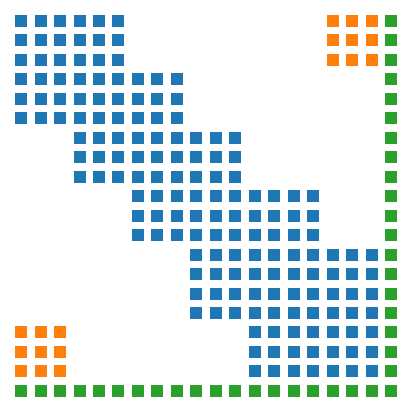

In [14]:
beta = 0
plt = spy(quickEM(beta), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Zrawbeta$(beta).png"))
# plt

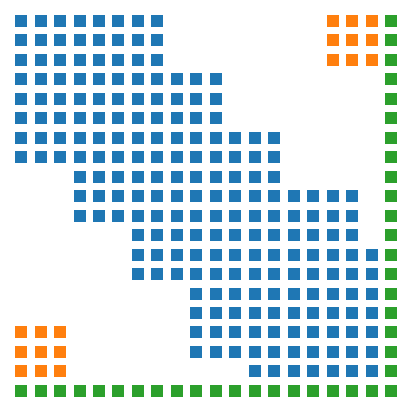

In [15]:
beta = 2
plt = spy(quickEM(beta), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Zrawbeta$(beta).png"))
# plt

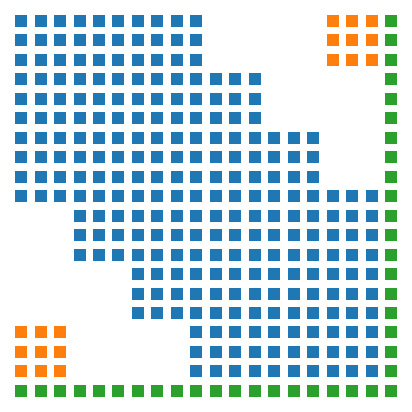

In [16]:
beta = 4
plt = spy(quickEM(beta), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Zrawbeta$(beta).png"))
# plt

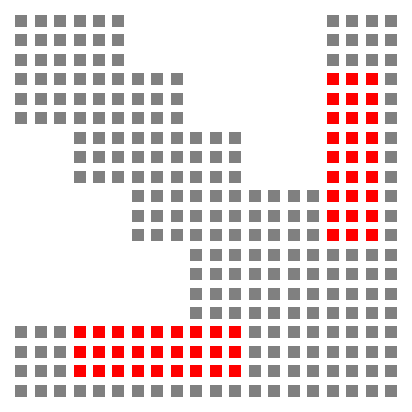

In [17]:
beta = 0

plt = spy(quickEK(),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickRawZ(beta),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)
savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta).png"))
# plt

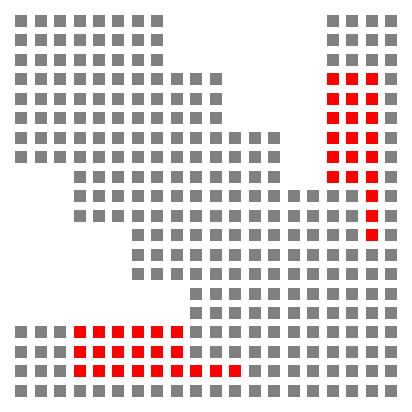

In [18]:
beta = 2

plt = spy(quickEK(),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickRawZ(beta),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)
savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta).png"))
# plt

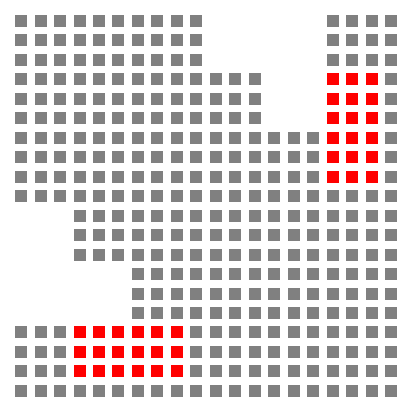

In [19]:
beta = 4

plt = spy(quickEK(),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickRawZ(beta),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta).png"))
# plt

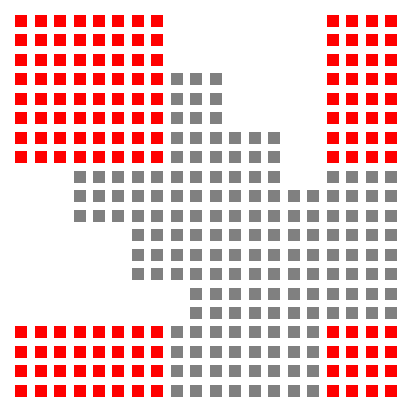

In [23]:
beta = 2

plt = spy(hots(quickEK() + quickRawZ(beta)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)

plt = spy!(plt, quickClique(beta, 1),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta)-clique1.png"));
# plt

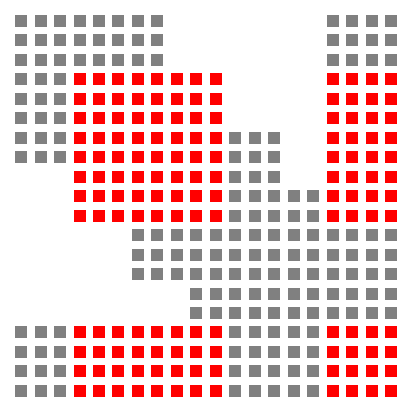

In [24]:
beta = 2

plt = spy(quickClique(beta, 2),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)

plt = spy!(plt, hots(quickEK() + quickRawZ(beta)) - hots(quickClique(beta, 2)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)


savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta)-clique2.png"));

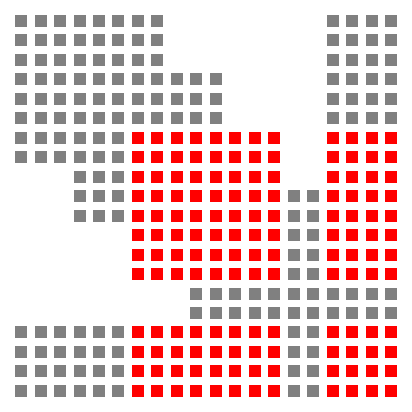

In [25]:
beta = 2

plt = spy(quickClique(beta, 3),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)


plt = spy!(plt, hots(quickEK() + quickRawZ(beta)) - hots(quickClique(beta, 3)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)


savefig(plt, joinpath(DUMP_DIR, "Zbeta$(beta)-clique3.png"));